In [2]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)
from ipywidgets import interact
from plotly.offline import init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import pandas as pd

init_notebook_mode(connected=True)

def ct_viewer(im):
    def plot_image(myslice):
        plt.imshow(im[myslice], cmap=plt.cm.jet)
    interact(plot_image, myslice=(0, im.shape[0]))
    return; 

In [35]:
name="6ebis"
im=sitk.ReadImage('/media/sf_Documents/phd/work/gateTrueBeamModel/tb/fullCreator/results/'+name+'/water/'+name+'.W.mhd')

(60, 150, 60)
(5.0, 2.0, 5.0)


interactive(children=(IntSlider(value=30, description='myslice', max=60), Output()), _dom_classes=('widget-int…

15
134
(60, 60)
(60, 60)


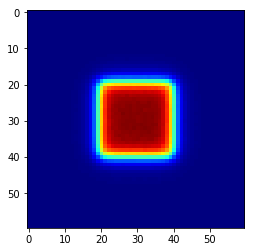

In [24]:
# GET LDP  

depth=30
print(im.GetSize())
print(im.GetSpacing())

imArray = sitk.GetArrayFromImage(im)
ct_viewer(imArray)
print (round((depth/im.GetSpacing()[1])))
depthim=int(((im.GetSize()[1]-1)-round(depth/im.GetSpacing()[1])))
print(depthim)
myslice=imArray[:, depthim, :]
plt.imshow(myslice, cmap=plt.cm.jet)
print(myslice.shape)
#y=imArray[19, :, 19]
ycross=myslice[:, int(im.GetSize()[0]/2)]
yin=myslice[int(im.GetSize()[2]/2), :]
print(myslice.shape)
#y=np.flipud(y)
x=np.arange(0,ycross.shape[0])
trace1=np.column_stack((x,ycross))
trace2=np.column_stack((x,yin))

In [36]:
# GET PDD
print(im.GetSize())
print(im.GetSpacing())
imArray = sitk.GetArrayFromImage(im)
ct_viewer(imArray)
y=imArray[(int(im.GetSize()[0]/2)-1), :, int((im.GetSize()[2]/2)-1)]
y=np.flipud(y)
x=np.arange(0,y.shape[0])
trace0=np.column_stack((x,y))

(60, 150, 60)
(5.0, 2.0, 5.0)


interactive(children=(IntSlider(value=30, description='myslice', max=60), Output()), _dom_classes=('widget-int…

In [26]:
# PLOT LDP
 datacross = Scatter(x = x,
                y = ycross,
                name='cross',
                mode = 'lines+markers')
 datain = Scatter(x = x,
                y = yin,
                name = 'in',
                mode = 'lines+markers')
 fig = dict(data=[datacross, datain])
 iplot(fig, image='svg')

In [37]:
# PLOT PDD 
data = Scatter(x = x,
               y = y,
               name='cross',
               mode = 'lines+markers')
fig = dict(data=[data])
iplot(fig, image='svg')

In [9]:
#*** SAVE LDP ***
np.savetxt('/home/gate/Documents/phd/data/JupyterNotebook/gammaIndex/estro2018/validation/18e/ldp_'+name+'_cross.csv', trace1, delimiter=',', header="step,value",comments="")
np.savetxt('/home/gate/Documents/phd/data/JupyterNotebook/gammaIndex/estro2018/validation/18e/ldp_'+name+'_in.csv', trace2, delimiter=',', header="step,value",comments="")

In [38]:
#*** SAVE PDD ***
np.savetxt('/home/gate/Documents/phd/data/JupyterNotebook/gammaIndex/estro2018/validation/6e/'+name+'_pdd.csv', trace0, delimiter=',', header="step,value",comments="")